<a href="https://colab.research.google.com/github/hoanganhloan172/Data_analys_with_python/blob/main/Buoi_12/B%C3%A0i_t%E1%BA%ADp_v%E1%BB%81_nh%C3%A0_Buoi12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [26]:
data = pd.read_csv('/content/movie.csv')

In [27]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [28]:
df = pd.DataFrame(data)

In [29]:
# Drop rows with missing values
df.dropna(subset=["title_year"], inplace=True)

In [30]:
# Convert title_year to datetime
df['title_year'] = pd.to_datetime(df['title_year'], format='%Y')

In [31]:
# Set title_year as index
df.set_index('title_year', inplace=True)


In [32]:
# Extract time series column
ts_column = "imdb_score"
ts = df[ts_column]

In [33]:
# Train-test split
train_size = int(len(ts) * 0.8)
train, test = ts.iloc[:train_size], ts.iloc[train_size:]

In [34]:
# Function to fit ARIMA model
def fit_arima(train, test, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    model = ARIMA(train, order=order)
                    model_fit = model.fit()
                    pred = model_fit.forecast(steps=len(test))[0]
                    mse = mean_squared_error(test, pred)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    print('Best ARIMA %s MSE=%.3f' % (best_cfg, best_score))

In [35]:
# Fit ARIMA model
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
fit_arima(train, test, p_values, d_values, q_values)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Best ARIMA None MSE=inf


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [36]:
# Function to fit AR model
def fit_ar(train, test, p_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        try:
            model = AutoReg(train, lags=p)
            model_fit = model.fit()
            pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
            mse = mean_squared_error(test, pred)
            if mse < best_score:
                best_score, best_cfg = mse, p
        except:
            continue
    print('Best AR %s MSE=%.3f' % (best_cfg, best_score))

In [37]:
# Fit AR model
p_values = range(1, 6)
fit_ar(train, test, p_values)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.1

Best AR 4 MSE=1.626


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [38]:
# Function to fit MA model
def fit_ma(train, test, q_values):
    best_score, best_cfg = float("inf"), None
    for q in q_values:
        try:
            model = ARMA(train, order=(0, q))
            model_fit = model.fit(disp=False)
            pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
            mse = mean_squared_error(test, pred)
            if mse < best_score:
                best_score, best_cfg = mse, q
        except:
            continue
    print('Best MA %s MSE=%.3f' % (best_cfg, best_score))

In [39]:
# Fit MA model
q_values = range(1, 6)
fit_ma(train, test, q_values)

Best MA None MSE=inf


In [40]:
# Function to fit ARMA model
def fit_arma(train, test, p_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for q in q_values:
            try:
                model = ARMA(train, order=(p, q))
                model_fit = model.fit(disp=False)
                pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
                mse = mean_squared_error(test, pred)
                if mse < best_score:
                    best_score, best_cfg = mse, (p, q)
            except:
                continue
    print('Best ARMA %s MSE=%.3f' % (best_cfg, best_score))

In [41]:
# Fit ARMA model
p_values = range(1, 6)
q_values = range(1, 6)
fit_arma(train, test, p_values, q_values)

Best ARMA None MSE=inf


In [42]:
# Function to plot time series and predictions
def plot_predictions(train, test, pred):
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, pred, label='Predictions')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

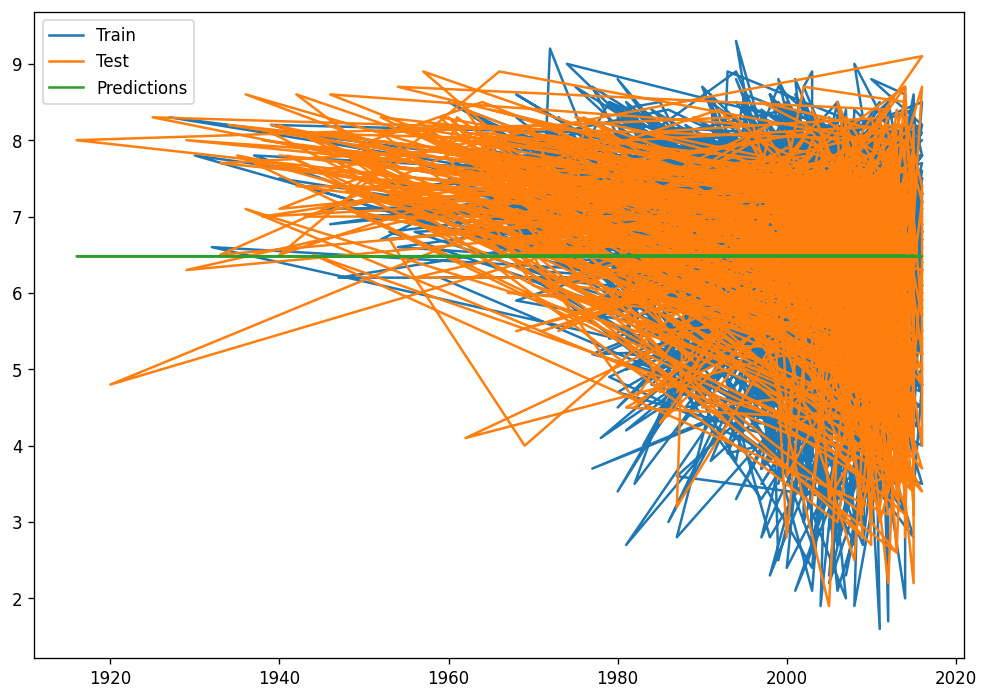

In [47]:
# Plot ARIMA predictions
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()
start_index = len(train)
end_index = len(train) + len(test) - 1
pred_arima = model_fit.predict(start=start_index, end=end_index, typ='levels')
plot_predictions(train, test, pred_arima)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.1

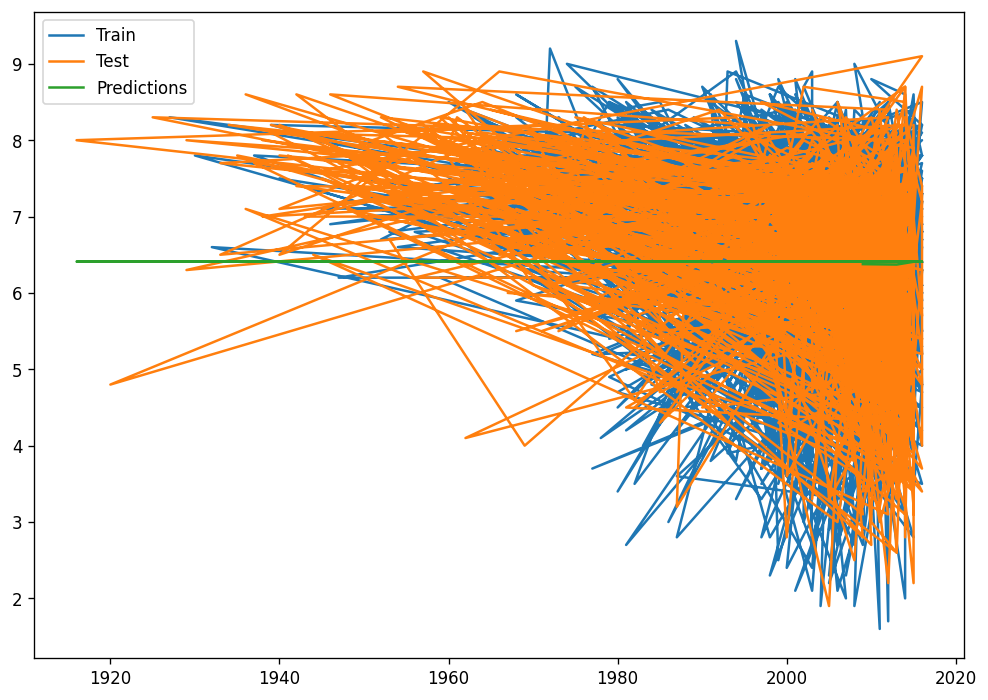

In [44]:
# Plot AR predictions
model = AutoReg(train, lags=2)
model_fit = model.fit()
pred_ar = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
plot_predictions(train, test, pred_ar)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

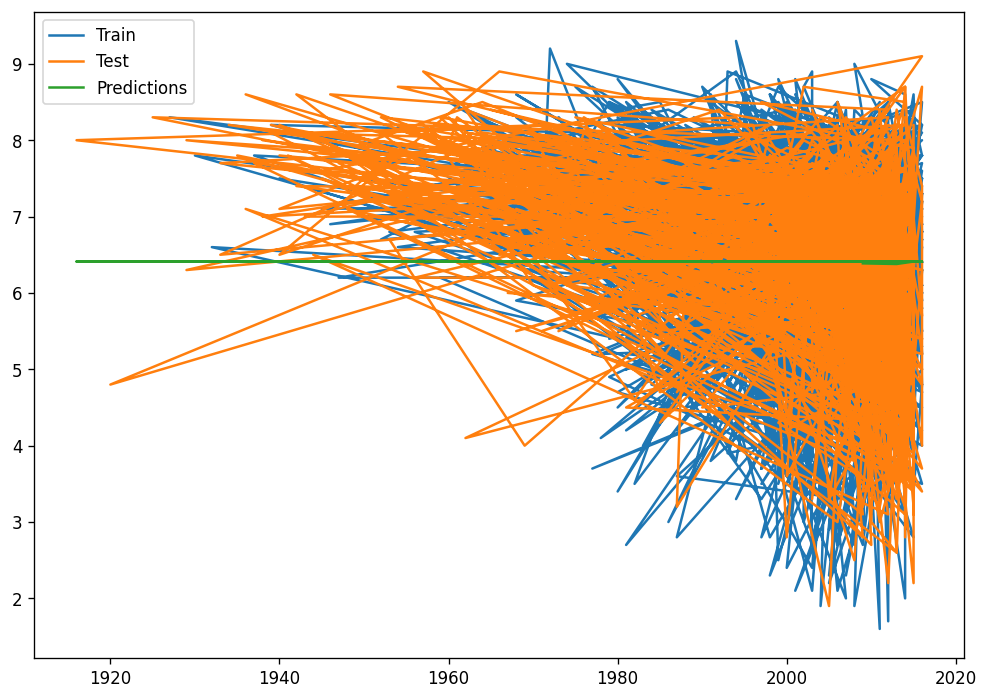

In [52]:
# Plot MA predictions
model = ARIMA(train, order=(0, 0, 2))
model_fit = model.fit()
pred_ma = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
plot_predictions(train, test, pred_ma)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

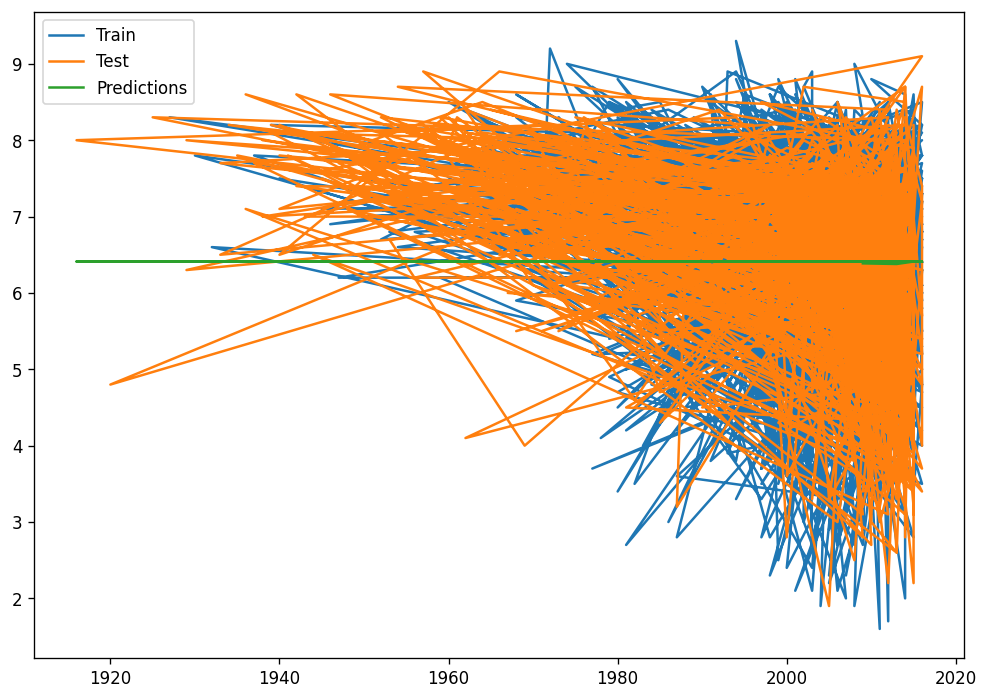

In [53]:
# Plot ARMA predictions
model = ARIMA(train, order=(0, 0, 2))
model_fit = model.fit()
pred_arma = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
plot_predictions(train, test, pred_arma)
